## Dr. K. Ilayaraja
### Department of Geology
### Univerity of Gondar
### Ethiopia

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = gpd.read_file('D:/Lecture/mylake.shp')
data

,id,lake,geometry
0,1,738711.839617,"POLYGON ((391159.0368911196 1404776.992633907,..."
1,2,331979.562573,"POLYGON ((391103.0204830226 1406242.350465218,..."
2,3,324350.752850,"POLYGON ((390386.4136294825 1406383.902436286,..."
3,1,546889.743808,"POLYGON ((391049.9384938711 1405746.918566475,..."
4,2,483301.392178,"POLYGON ((390502.6695157737 1405490.05569512, ..."
5,3,453416.397012,"POLYGON ((389866.7768259766 1405356.961876329,..."
6,1,715576.815046,"POLYGON ((389763.2594113583 1404883.739409501,..."
7,2,582886.053504,"POLYGON ((390450.9108084654 1404558.398963556,..."
8,1,979887.957451,"POLYGON ((389955.5060385065 1404292.211325968,..."
9,1,523399.522209,"POLYGON ((391159.0368911196 1404776.992633907,..."


In [3]:
data.columns
data.head()

,id,lake,geometry
0,1,738711.839617,"POLYGON ((391159.0368911196 1404776.992633907,..."
1,2,331979.562573,"POLYGON ((391103.0204830226 1406242.350465218,..."
2,3,324350.752850,"POLYGON ((390386.4136294825 1406383.902436286,..."
3,1,546889.743808,"POLYGON ((391049.9384938711 1405746.918566475,..."
4,2,483301.392178,"POLYGON ((390502.6695157737 1405490.05569512, ..."


In [4]:
data.crs


{'init': 'epsg:32644'}

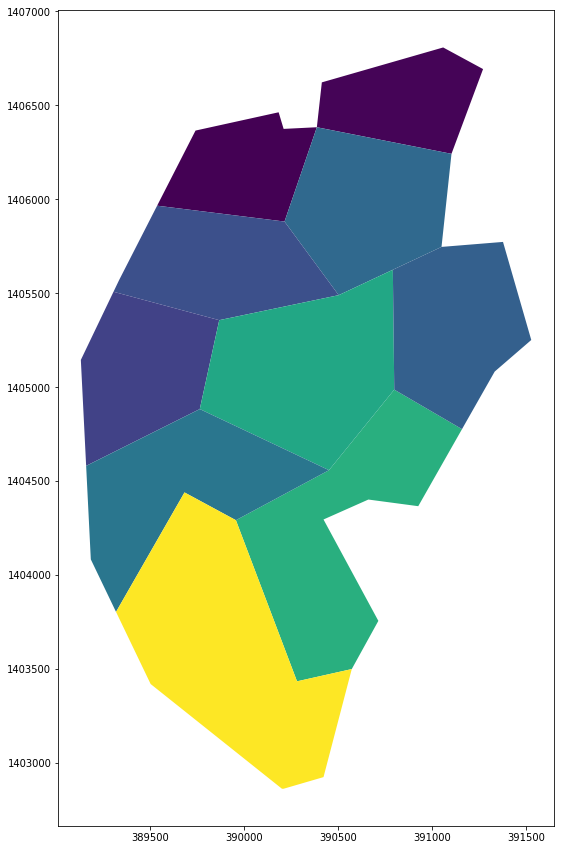

In [5]:
data.plot(column= 'lake', figsize=(15,15))

In [6]:
data1=data.to_crs(epsg=4326)
data1

,id,lake,geometry
0,1,738711.839617,"POLYGON ((79.99753050027373 12.70549200942387,..."
1,2,331979.562573,"POLYGON ((79.99696262934471 12.71873912305542,..."
2,3,324350.752850,"POLYGON ((79.99035770677996 12.7199939074015, ..."
3,1,546889.743808,"POLYGON ((79.99649134368504 12.71425781693568,..."
4,2,483301.392178,"POLYGON ((79.99146031405782 12.71191626632197,..."
5,3,453416.397012,"POLYGON ((79.98560875914741 12.71069056326149,..."
6,1,715576.815046,"POLYGON ((79.98467240041489 12.70640827955954,..."
7,2,582886.053504,"POLYGON ((79.99101687725884 12.70349087208542,..."
8,1,979887.957451,"POLYGON ((79.98646407336119 12.7010667500609, ..."
9,1,523399.522209,"POLYGON ((79.99753050027373 12.70549200942387,..."


In [7]:
data.describe()

,id,lake
count,10.000000,10.000000
mean,1.700000,568040.003625
std,0.823273,199611.684389
min,1.000000,324350.752850
25%,1.000000,460887.645803
50%,1.500000,535144.633008
75%,2.000000,682404.124660
max,3.000000,979887.957451


In [8]:
import folium
from folium import plugins

In [9]:
import folium
m = folium.Map(location=[12.71129557162551, 79.98430636079298], zoom_start=20)
folium.GeoJson(data1).add_to(m)
folium.LatLngPopup().add_to(m)
m

In [10]:
m = folium.Map(location=[12.7103, 79.9886], zoom_start=20)

#geo_data=data1.to_json()

folium.Choropleth(geo_data=data1.to_json(),
                  data=data1,
                  columns=['id', 'lake'],
                  key_on = 'feature.properties.id',
                  fill_color='Set1_r',
                  classification = 'Quantiles',
                  classes=4,
                  #fill_opacity=0.7, 
                  #line_opacity=0.3,
                  highlight=True,
                  legend_name='Lake').add_to(m)
m